<a href="https://colab.research.google.com/github/wockeshuh/CSCI167/blob/main/Glass_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Glass Identification
by: Freddy Barrita



##1. Goal of the Project
- Objective: develop a machine learning model that can accurately classify different types of glass based on various features such as refractive index, chemical composition, and other properties.
- Importance: Proper classification of glass types is critical in fields such as forensic investigations, quality control, recycling, and material innovation.

##2. Design of Solution
- Data Collection: A dataset from the UCI Machine Learning Repository called "Glass Identification"
- Data Preprocessing: Encoding categorical variables and normalizing or standardizing features to ensure compatibility with machine learning algorithms.
- Data Analysis: Perform an analysis to uncover patterns and relationships between the features and the target variable.
- Visualization: Create visualizations to display findings.

#Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import cohen_kappa_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns



#Load the dataset

In [ ]:
# class names for the glass dataset
column_names = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data', names=column_names, header=None)

# display dataset info
print(data.head())

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


#Data Preprocessing

In [ ]:
# separate features and target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# encode the target variable
y_encoded = to_categorical(y - 1)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


#Modeling

In [ ]:
# build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(y_encoded.shape[1], activation='softmax')
])

learning_rate = 0.0005  # You can adjust this value as needed
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the optimizer
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# train model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.0535 - loss: 1.9782 - val_accuracy: 0.0286 - val_loss: 1.9627
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0825 - loss: 1.9301 - val_accuracy: 0.2286 - val_loss: 1.9269
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3598 - loss: 1.8863 - val_accuracy: 0.2857 - val_loss: 1.8947
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3780 - loss: 1.8507 - val_accuracy: 0.3143 - val_loss: 1.8671
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3617 - loss: 1.8339 - val_accuracy: 0.3714 - val_loss: 1.8440
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3644 - loss: 1.8096 - val_accuracy: 0.3714 - val_loss: 1.8225
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3704 - loss: 1.7661 - val_accuracy: 0.3714 - val_loss: 1.8008
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4035 - loss: 1.7411 - val_accuracy: 0.3429 - val_loss:

#Data Analysis

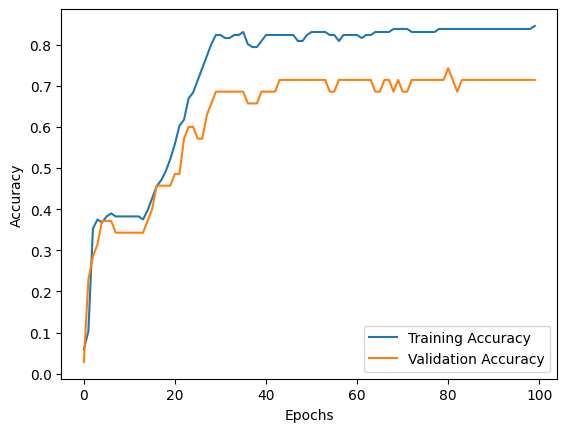

Test Accuracy: 0.8372092843055725, Test Loss: 0.5246901512145996


In [ ]:
# plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# evaluate model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy}, Test Loss: {test_loss}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


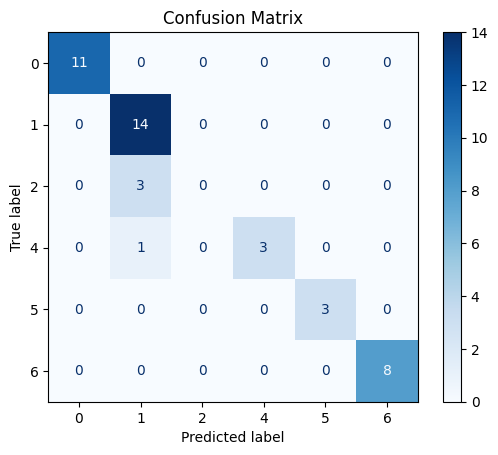

In [ ]:
# get predictions for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))

# plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# F1 Score
f1 = f1_score(y_true, y_pred_classes, average='weighted')
print(f"Weighted F1 Score: {f1:.4f}")


Weighted F1 Score: 0.7858


In [ ]:
kappa = cohen_kappa_score(y_true, y_pred_classes)
print(f"Cohen's Kappa Score: {kappa:.4f}")

Cohen's Kappa Score: 0.7820
